In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [55]:
dataset = pd.read_csv("/content/cancer patient data sets(1).csv")

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [57]:
dataset.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,1
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1


In [58]:
dataset.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.697000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.459785
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,1.000000


In [59]:
dataset.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [60]:
dataset.shape

(1000, 26)

In [61]:
print(dataset.dtypes)

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swal0ing Difficulty          int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                        int64
dtype: object


In [62]:
import pandas as pd

# Convert all non-numeric columns to numeric, replacing non-convertible values with NaN
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Now calculate the correlation matrix
correlation_matrix = dataset.corr()

# Print the correlation matrix
print(correlation_matrix)


                             index  Patient Id       Age    Gender  \
index                     1.000000         NaN  0.002674 -0.025739   
Patient Id                     NaN         NaN       NaN       NaN   
Age                       0.002674         NaN  1.000000 -0.202086   
Gender                   -0.025739         NaN -0.202086  1.000000   
Air Pollution             0.053307         NaN  0.099494 -0.246912   
Alcohol use               0.041374         NaN  0.151742 -0.227636   
Dust Allergy              0.037960         NaN  0.035202 -0.204312   
OccuPational Hazards      0.032355         NaN  0.062177 -0.192343   
Genetic Risk              0.030725         NaN  0.073151 -0.222727   
chronic Lung Disease      0.025177         NaN  0.128952 -0.205061   
Balanced Diet             0.030743         NaN  0.004863 -0.099741   
Obesity                   0.050584         NaN  0.034337 -0.123813   
Smoking                   0.018407         NaN  0.075333 -0.206924   
Passive Smoker      

In [63]:
hist_data =[dataset["Age"].values]
group_labels = ['Age']
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

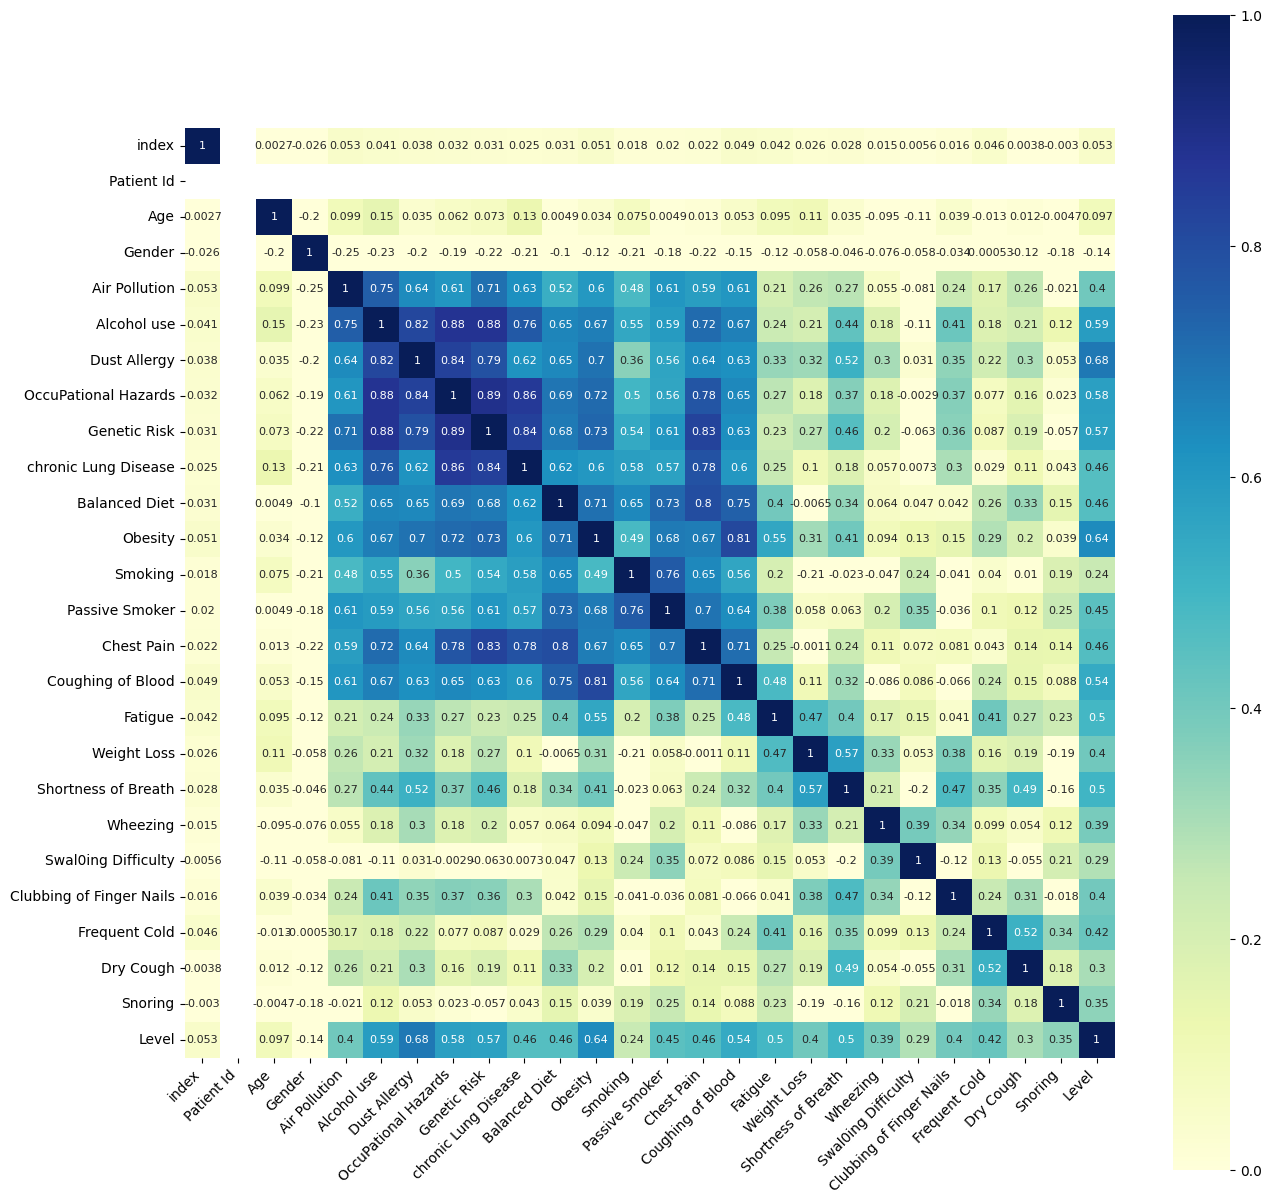

In [64]:
corrmat = correlation_matrix
plt.subplots(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(corrmat, annot=True, square=True, vmin=0, vmax=1, cmap="YlGnBu", annot_kws={"size": 8})

# Rotate x and y tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

<Axes: xlabel='Level', ylabel='count'>

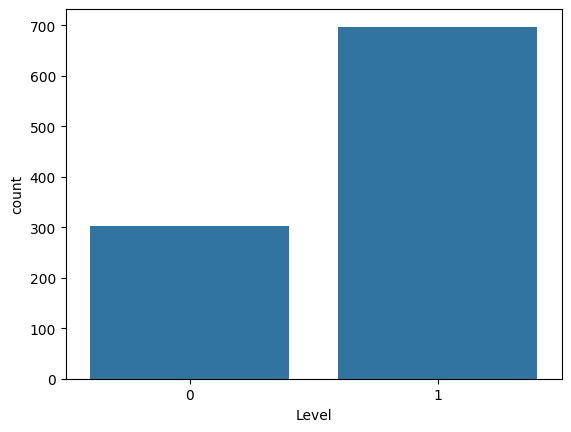

In [65]:
sns.countplot(x = 'Level',data = dataset)

<Axes: xlabel='Chest Pain', ylabel='count'>

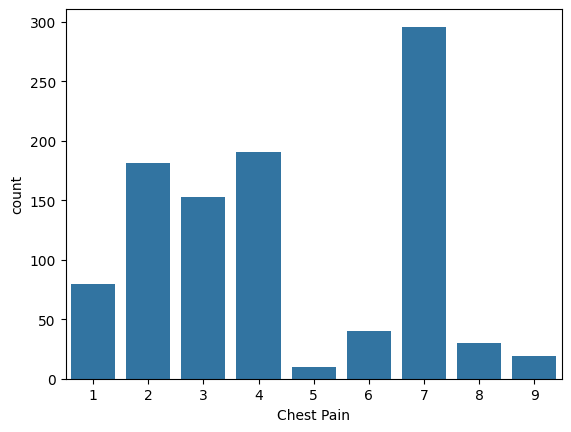

In [66]:
sns.countplot(x = 'Chest Pain',data = dataset)

<Axes: xlabel='Passive Smoker', ylabel='count'>

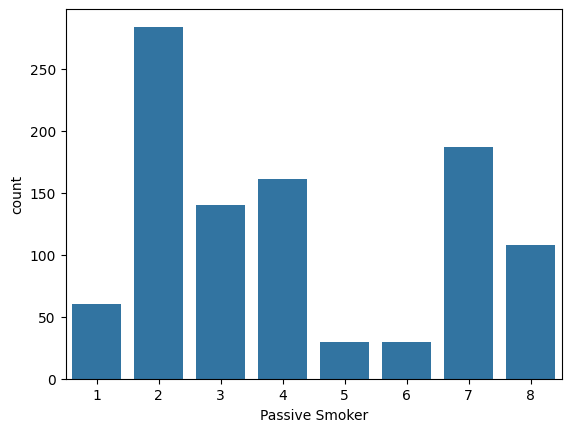

In [67]:
sns.countplot(x = 'Passive Smoker',data = dataset)

In [68]:
dataset['Snoring'].unique()

array([4, 2, 5, 3, 1, 6, 7])

In [69]:
dataset['Genetic Risk'].unique()

array([3, 4, 5, 6, 7, 2, 1])

<Axes: xlabel='chronic Lung Disease', ylabel='count'>

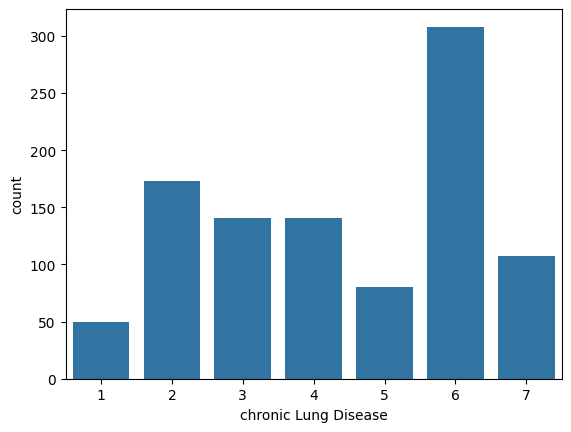

In [70]:
sns.countplot(x = 'chronic Lung Disease',data = dataset)

In [71]:
dataset['Obesity'].unique()

array([4, 2, 7, 3, 5, 6, 1])

In [72]:
values = dataset['Level'].value_counts().tolist()
names = list(dict(dataset['Level'].value_counts()).keys())

px.pie(dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green","blue"])

In [73]:
le = preprocessing.LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Level'] = le.fit_transform(dataset['Level'])

In [74]:
dataset['Gender']

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,1
998,1


In [75]:
dataset['Level']

,Level
0,0
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [76]:
dataset

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,NaN,33,0,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,NaN,17,0,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,NaN,35,0,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
3,3,NaN,37,0,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,1
4,4,NaN,46,0,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,NaN,44,0,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,1
996,996,NaN,37,1,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,1
997,997,NaN,25,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
998,998,NaN,18,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1


In [77]:
print(dataset.corr()["Level"].abs().sort_values(ascending=False))

Level                       1.000000
Dust Allergy                0.683626
Obesity                     0.638192
Alcohol use                 0.587038
OccuPational Hazards        0.575850
Genetic Risk                0.572926
Coughing of Blood           0.542739
Shortness of Breath         0.502783
Fatigue                     0.495018
Chest Pain                  0.463752
Balanced Diet               0.460569
chronic Lung Disease        0.459490
Passive Smoker              0.445525
Frequent Cold               0.421055
Weight Loss                 0.404594
Air Pollution               0.402653
Clubbing of Finger Nails    0.401744
Wheezing                    0.388558
Snoring                     0.350741
Dry Cough                   0.303725
Swal0ing Difficulty         0.286752
Smoking                     0.244449
Gender                      0.142881
Age                         0.096786
index                       0.053425
Patient Id                       NaN
Name: Level, dtype: float64


In [78]:
X = dataset.drop(['Age','Gender','Shortness of Breath','Smoking','Level'],axis=1)

In [79]:
X

,index,Patient Id,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,NaN,2,4,5,4,3,2,2,4,...,2,4,3,4,2,3,1,2,3,4
1,1,NaN,3,1,5,3,4,2,2,2,...,2,3,1,3,8,6,2,1,7,2
2,2,NaN,4,5,6,5,5,4,6,7,...,4,8,8,7,2,1,4,6,7,2
3,3,NaN,7,7,7,7,6,7,7,7,...,7,8,4,2,1,4,5,6,7,5
4,4,NaN,6,8,7,7,7,6,7,7,...,7,9,3,2,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,NaN,6,7,7,7,7,6,7,7,...,7,7,5,3,7,8,2,4,5,3
996,996,NaN,6,8,7,7,7,6,7,7,...,7,7,9,6,7,2,4,3,1,4
997,997,NaN,4,5,6,5,5,4,6,7,...,4,8,8,7,2,1,4,6,7,2
998,998,NaN,6,8,7,7,7,6,7,7,...,7,9,3,2,1,4,2,4,2,3


In [83]:
y = dataset['Level']

In [84]:
y

,Level
0,0
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [85]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('/content/cancer patient data sets(1).csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Handling Missing Values
# Option 1: Drop rows with missing values
# df_dropped = df.dropna()

# Option 2: Impute missing values
from sklearn.impute import SimpleImputer

# Example: Mean imputation for numerical columns
mean_imputer = SimpleImputer(strategy='mean')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = mean_imputer.fit_transform(df[numerical_cols])

# Example: Mode imputation for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])

# Check the DataFrame after handling missing values
print("\nDataFrame after handling missing values:")
print(df.head())


Missing values in each column:
Series([], dtype: int64)

DataFrame after handling missing values:
   index Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0    0.0         P1  33.0     1.0            2.0          4.0           5.0   
1    1.0        P10  17.0     1.0            3.0          1.0           5.0   
2    2.0       P100  35.0     1.0            4.0          5.0           6.0   
3    3.0      P1000  37.0     1.0            7.0          7.0           7.0   
4    4.0       P101  46.0     1.0            6.0          8.0           7.0   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                   4.0           3.0                   2.0  ...      3.0   
1                   3.0           4.0                   2.0  ...      1.0   
2                   5.0           5.0                   4.0  ...      8.0   
3                   7.0           6.0                   7.0  ...      4.0   
4                   7.0           7.0     

MODEL BUILDING


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

RANDOM FOREST CLASSIFIER

In [88]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X, y)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  100.0 

*Confusion Matrix for RF: 
[[ 67   0]
 [  0 133]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       133

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [89]:
y_pred_rf = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 1.0


(1.0, 0.335)

In [96]:
# Check the data types of each column
print(df.dtypes)


index                       float64
Patient Id                   object
Age                         float64
Gender                      float64
Air Pollution               float64
Alcohol use                 float64
Dust Allergy                float64
OccuPational Hazards        float64
Genetic Risk                float64
chronic Lung Disease        float64
Balanced Diet               float64
Obesity                     float64
Smoking                     float64
Passive Smoker              float64
Chest Pain                  float64
Coughing of Blood           float64
Fatigue                     float64
Weight Loss                 float64
Shortness of Breath         float64
Wheezing                    float64
Swal0ing Difficulty         float64
Clubbing of Finger Nails    float64
Frequent Cold               float64
Dry Cough                   float64
Snoring                     float64
Level                       float64
dtype: object


ANN


In [98]:
# Inspect unique values in the relevant columns
print("Unique values in Patient Id:", df['Patient Id'].unique())
print("Unique values in Gender:", df['Gender'].unique())

# Drop Patient Id as it doesn't contribute to predictions
df = df.drop(columns=['Patient Id'])

# If Gender is numerical and categorical, you may want to convert it
# For example, if Gender is represented as 1 and 2, you might convert them to "Male" and "Female"
# Assuming 1 = Male, 2 = Female
df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female'})

# If Gender is now categorical, you can encode it using pd.get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Now separate the features and target variable
X = df_encoded.drop(columns=['Level'])  # Adjust 'Level' to your target variable's name
y = df_encoded['Level']  # Adjust as needed

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model again
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and fit the ANN
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(X_train, y_train)

# Make predictions
predictions = ANN.predict(X_test)

# Evaluate the model
val4 = accuracy_score(y_test, predictions) * 100
print("*Accuracy score for ANN: ", val4, "\n")
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ANN: ")
print(classification_report(y_test, predictions))


Unique values in Patient Id: ['P1' 'P10' 'P100' 'P1000' 'P101' 'P102' 'P103' 'P104' 'P105' 'P106'
 'P107' 'P108' 'P109' 'P11' 'P110' 'P111' 'P112' 'P113' 'P114' 'P115'
 'P116' 'P117' 'P118' 'P119' 'P12' 'P120' 'P121' 'P122' 'P123' 'P124'
 'P125' 'P126' 'P127' 'P128' 'P129' 'P13' 'P130' 'P131' 'P132' 'P133'
 'P134' 'P135' 'P136' 'P137' 'P138' 'P139' 'P14' 'P140' 'P141' 'P142'
 'P143' 'P144' 'P145' 'P146' 'P147' 'P148' 'P149' 'P15' 'P150' 'P151'
 'P152' 'P153' 'P154' 'P155' 'P156' 'P157' 'P158' 'P159' 'P16' 'P160'
 'P161' 'P162' 'P163' 'P164' 'P165' 'P166' 'P167' 'P168' 'P169' 'P17'
 'P170' 'P171' 'P172' 'P173' 'P174' 'P175' 'P176' 'P177' 'P178' 'P179'
 'P18' 'P180' 'P181' 'P182' 'P183' 'P184' 'P185' 'P186' 'P187' 'P188'
 'P189' 'P19' 'P190' 'P191' 'P192' 'P193' 'P194' 'P195' 'P196' 'P197'
 'P198' 'P199' 'P2' 'P20' 'P200' 'P201' 'P202' 'P203' 'P204' 'P205' 'P206'
 'P207' 'P208' 'P209' 'P21' 'P210' 'P211' 'P212' 'P213' 'P214' 'P215'
 'P216' 'P217' 'P218' 'P219' 'P22' 'P220' 'P221' 'P222' 

In [99]:
y_pred_ann = ANN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ann)
cm
ann_result = accuracy_score(y_test,y_pred_ann)
print("Accuracy :",ann_result)
recall_ann = cm[0][0]/(cm[0][0] + cm[0][1])
precision_ann = cm[0][0]/(cm[0][0]+cm[1][1])
recall_ann,precision_ann

Accuracy : 0.725


(0.0, 0.0)

In [100]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

DECISION TREE


In [102]:
from sklearn.tree import DecisionTreeClassifier
log = DecisionTreeClassifier(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Decision Tree: ", val8, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_test, predictions))

*Accuracy score for Decision Tree:  100.0 

*Confusion Matrix for Decision Tree: 
[[ 55   0]
 [  0 145]]
*Classification Report for Decision Tree: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00       145

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [103]:
y_pred_dc = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dc)
cm
dc_result = accuracy_score(y_test,y_pred_dc)
print("Accuracy :",dc_result)
recall_dc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dc,precision_dc

Accuracy : 1.0


(1.0, 0.275)

LOGESTIC REGRESSION


In [104]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val7, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_test, predictions))

*Accuracy score for Logistic Regression:  94.0 

*Confusion Matrix for Logistic Regression: 
[[ 45  10]
 [  2 143]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88        55
         1.0       0.93      0.99      0.96       145

    accuracy                           0.94       200
   macro avg       0.95      0.90      0.92       200
weighted avg       0.94      0.94      0.94       200



In [105]:
y_pred_log = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
cm
log_result = accuracy_score(y_test,y_pred_log)
print("Accuracy :",log_result)
recall_log = cm[0][0]/(cm[0][0] + cm[0][1])
precision_log = cm[0][0]/(cm[0][0]+cm[1][1])
recall_log,precision_log

Accuracy : 0.94


(0.8181818181818182, 0.2393617021276596)

KNN


In [106]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X, y)
predictions = KNN.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val3, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  95.5 

*Confusion Matrix for KNN: 
[[ 52   3]
 [  6 139]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        55
         1.0       0.98      0.96      0.97       145

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.96      0.95      0.96       200



In [107]:
y_pred_knn = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

Accuracy : 0.955


(0.9454545454545454, 0.27225130890052357)

Stacking classifier


In [108]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

In [109]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

In [110]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X, y)
predictions = clf.predict(X_test)
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Stacking Classifier: ", val6, "\n")
print("*Confusion Matrix for Stacking Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Stacking Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Stacking Classifier:  100.0 

*Confusion Matrix for Stacking Classifier: 
[[ 55   0]
 [  0 145]]
*Classification Report for Stacking Classifier: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00       145

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [111]:
y_pred_sc = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_sc)
cm
sc_result = accuracy_score(y_test,y_pred_sc)
print("Accuracy :",sc_result)
recall_sc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_sc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_sc,precision_sc

Accuracy : 1.0


(1.0, 0.275)

SVM


In [115]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  72.5 

*Confusion Matrix for SVM: 
[[  0  55]
 [  0 145]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.72      1.00      0.84       145

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



In [116]:
y_pred_svm = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm

Accuracy : 0.725


(0.0, 0.0)

Voting classifier


In [117]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [118]:
clf1 = SVC()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [119]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X, y)
predictions = eclf.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val5, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Voting Classifier:  98.5 

*Confusion Matrix for Voting Classifier: 
[[ 52   3]
 [  0 145]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        55
         1.0       0.98      1.00      0.99       145

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



In [120]:
y_pred_eclf = eclf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_eclf)
cm
eclf_result = accuracy_score(y_test,y_pred_eclf)
print("Accuracy :",eclf_result)
recall_eclf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_eclf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_eclf,precision_eclf

Accuracy : 0.985


(0.9454545454545454, 0.2639593908629442)

Accuracy Comparison

In [121]:
 score = [val1,val2,val3,val4,val5,val6,val7,val8]
#make variabel for save the result and to show it
classifier = ('SVM','Random Forest','KNN','ANN','Voting Classifier','Stacking Classifier','Logistic Regression','Decision Tree')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7]
[72.5, 100.0, 95.5, 72.5, 98.5, 100.0, 94.0, 100.0]


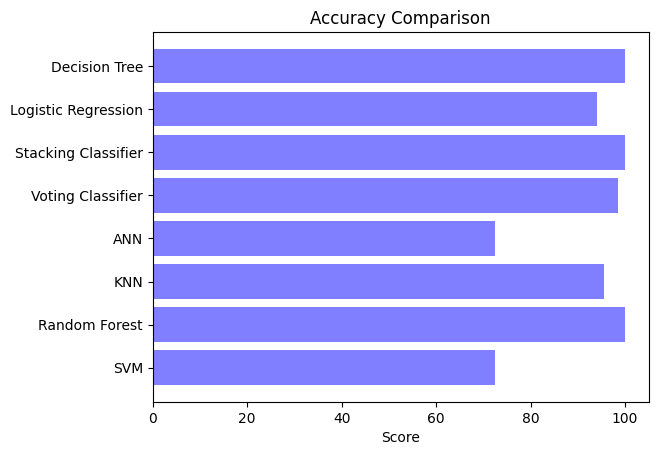

In [122]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [123]:
results ={'Accuracy': [svm_result*100,rf_result*100,knn_result*100,ann_result*100,eclf_result*100,sc_result*100,log_result*100,dc_result*100],
 'Recall':[recall_svm*100,recall_rf*100,recall_knn*100,recall_ann*100,recall_eclf*100,recall_sc*100,recall_log*100,recall_dc*100],
 'Precision': [precision_svm*100,precision_rf*100,precision_knn*100,precision_ann*100,precision_eclf*100,precision_sc*100,precision_log*100,precision_dc*100]}
index = ['SVM','Random Forest','KNN','ANN','Voting Classifier','Stacking Classifier','Logistic Regression','Decision Tree']

In [124]:
results =pd.DataFrame(results,index=index)

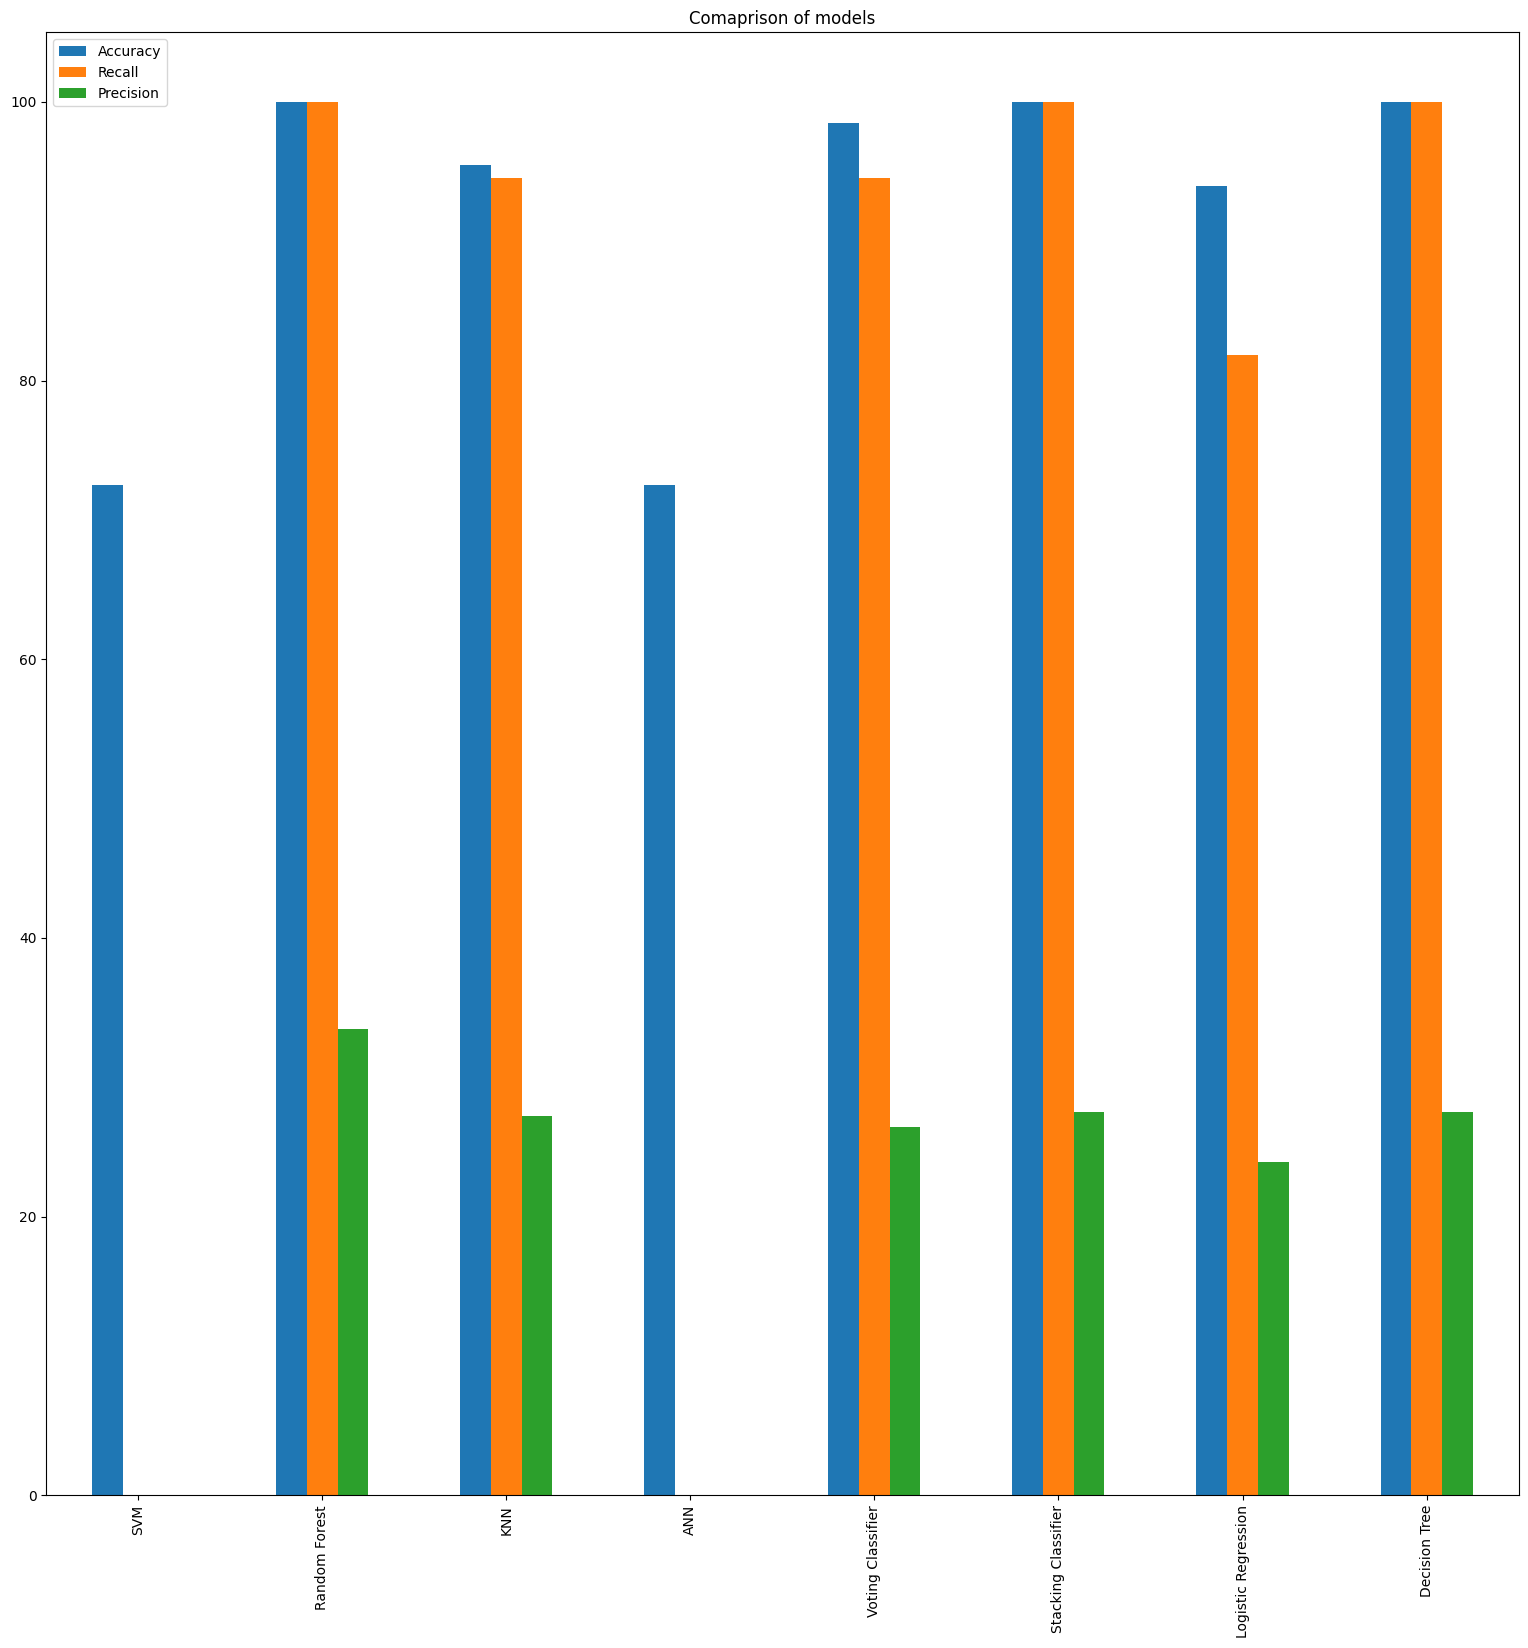

In [125]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('acc.png')